# About The Dataset

- The Coral Spawning Database includes over 6,000 observations of the time or day of spawning for over 300 scleractinian species from 101 sites in the Indo-Pacific.

### Dataset: 
- [The coral spawning database](https://data.ncl.ac.uk/articles/dataset/Coral_Spawning_Database/13082333/1?file=25048202)


### Reference
- Baird, A.H., Guest, J.R., Edwards, A.J. et al. [An Indo-Pacific coral spawning database](https://www.nature.com/articles/s41597-020-00793-8#Abs1). Sci Data 8, 35 (2021). https://doi.org/10.1038/s41597-020-00793-8

In [1]:
# Import libraries
import pandas as pd
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 01_Get the Data

## Load data 

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel('CSD_Tables.xlsx', sheet_name='tblTmpSpawningObsForAnalysis')
#data.info()
data.head()

,Obs_ID,Ecoregion,Country,Site,Subsite,Latitude,Longitude,Subsite_ID,Genus,O_n,Species,Taxon,Coral_ID,N,N_min,Date,Start_decimal,STrSS,STrSR,No_start,Quality_start,End_decimal,ETrSS,ETrSR,No_end,Quality_end,Gamete_release,Situation,DoNFM,DoSRtNFM,ToSS_decimal,ToSR_decimal,Timezone,Reference,Ref_ID,Comments
0,1,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Porites,NaN,cylindrica,Porites cylindrica,756,-99.0,1.0,1988-10-27,20.500000,2.116667,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Sperm,In situ,1988-10-24,3,18.383333,5.816667,-11.0,Itano & Buckley 1988,69,NaN
1,2,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Porites,NaN,cylindrica,Porites cylindrica,756,15.0,15.0,1995-11-09,20.583333,2.116667,NaN,False,Exact,20.916667,2.450000,NaN,False,Exact,Sperm,In situ,1995-11-06,3,18.466667,5.750000,-11.0,Mundy & Green 1999,97,NaN
2,3,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Acropora,NaN,muricata,Acropora muricata,96,-99.0,1.0,1995-11-10,20.333333,1.866667,NaN,False,Exact,21.333333,2.866667,NaN,False,Exact,Bundles,In situ,1995-11-06,4,18.466667,5.750000,-11.0,Mundy & Green 1999,97,NaN
3,4,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Merulina,NaN,ampliata,Merulina ampliata,1190,6.0,6.0,1995-11-11,19.750000,1.283333,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Bundles,In situ,1995-11-06,5,18.466667,5.733333,-11.0,Mundy & Green 1999,97,NaN
4,5,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Montipora,NaN,grisea,Montipora grisea,249,3.0,3.0,1995-11-11,20.750000,2.283333,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Bundles,In situ,1995-11-06,5,18.466667,5.733333,-11.0,Mundy & Green 1999,97,NaN


- After researching more information about coral spawning. I think a day length (hours of the sun) also influences the  time of coral spawning
- Therefore, under this line we read the data from another table. And we will calculate the length of day light (hours) and add to the data table for further analysis

## Load data from another table to get sunset, sunrise info

In [4]:
data_sun = pd.read_excel('CSD_Tables.xlsx', sheet_name='tblSpawningObservations')
#data_sun.info()
data_sun.head()

,Obs_ID,Subsite_ID,Depth_m,Genus,O_n,Species,Coral_ID,Date,N,Start_time,No_start,Quality_start,End_time,No_end,Quality_end,Gamete_release,Situation,Timezone,DoNFM,DoSRtNFM,Sunrise,Sunset,Reference,Ref_ID,Comments
0,1,1,-99.0,Porites,NaN,cylindrica,756,27/10/1988,-99.0,20:30,False,Exact,NaN,True,NaN,Sperm,In situ,-11.0,1988-10-24,3,05:49:27.862000,18:23:43.071000,Itano & Buckley 1988,69,NaN
1,2,1,-99.0,Porites,NaN,cylindrica,756,09/11/1995,15.0,20:35,False,Exact,20:55,False,Exact,Sperm,In situ,-11.0,1995-11-06,3,05:45:13.701000,18:27:59.613000,Mundy & Green 1999,97,NaN
2,3,1,-99.0,Acropora,NaN,muricata,96,10/11/1995,-99.0,20:20,False,Exact,21:20,False,Exact,Bundles,In situ,-11.0,1995-11-06,4,05:45:00.128000,18:28:24.573000,Mundy & Green 1999,97,NaN
3,4,1,-99.0,Merulina,NaN,ampliata,1190,11/11/1995,6.0,19:45,False,Exact,NaN,True,NaN,Bundles,In situ,-11.0,1995-11-06,5,05:44:47.684000,18:28:50.123000,Mundy & Green 1999,97,NaN
4,5,1,-99.0,Montipora,NaN,grisea,249,11/11/1995,3.0,20:45,False,Exact,NaN,True,NaN,Bundles,In situ,-11.0,1995-11-06,5,05:44:47.684000,18:28:50.123000,Mundy & Green 1999,97,NaN


In [5]:
# Convert to string preparing for calculation
data_sun['Sunset'] = data_sun['Sunset'].astype(str)
data_sun['Sunrise'] = data_sun['Sunrise'].astype(str)

In [6]:
# Split into hour(h), minute(m), second(s)
sunset_h = []
sunset_m = []
#sunset_s = []
sunrise_h = []
sunrise_m = []
#sunrise_s = []

for i in range(len(data_sun)):
    sunset_h.append(data_sun['Sunset'].str.split(':')[i][0])
    sunset_m.append(data_sun['Sunset'].str.split(':')[i][1])
    #sunset_s.append(data_sun['Sunset'].str.split(':')[i][2])
    sunrise_h.append(data_sun['Sunrise'].str.split(':')[i][0])
    sunrise_m.append(data_sun['Sunrise'].str.split(':')[i][1])
    #sunrise_s.append(data_sun['Sunrise'].str.split(':')[i][2])

In [7]:
# Convert to integer
sunset_h = [int(i) for i in sunset_h]
sunset_m = [int(i) for i in sunset_m]
sunrise_h = [int(i) for i in sunrise_h]
sunrise_m = [int(i) for i in sunrise_m]

In [8]:
# Put them in dataframe
data_sun['sunset_h'] = pd.DataFrame(sunset_h)
data_sun['sunset_m'] = pd.DataFrame(sunset_m)
data_sun['sunrise_h'] = pd.DataFrame(sunrise_h)
data_sun['sunrise_m'] = pd.DataFrame(sunrise_m)

In [9]:
# Calculate the hour and minute difference
daylength_hour_diff = []
daylength_min_diff = []

for i in range(len(sunset_h)):
    if sunset_m[i] < sunrise_m[i]:
        daylength_hour_diff.append(sunset_h[i] - sunrise_h[i])
        sunset_h[i] = sunset_h[i] - 1
        sunset_m[i] = sunset_m[i] + 60
        daylength_min_diff.append(sunset_m[i] - sunrise_m[i])
    else:
        daylength_hour_diff.append(sunset_h[i] - sunrise_h[i])
        daylength_min_diff.append(sunset_m[i] - sunrise_m[i])

In [10]:
# Put into dataframe
data_sun['daylength_hour'] = pd.DataFrame(daylength_hour_diff)
data_sun['daylength_min'] = pd.DataFrame(daylength_min_diff)

In [11]:
# Concat values of two column hour+min into one column 
data_sun['daylen_decimal'] = data_sun['daylength_hour'].map(str) + '.' + data_sun['daylength_min'].map(str)
data_sun['sunset_decimal'] = data_sun['sunset_h'].map(str) + '.' + data_sun['sunset_m'].map(str)
data_sun['sunrise_decimal'] = data_sun['sunrise_h'].map(str) + '.' + data_sun['sunrise_m'].map(str)

In [12]:
# Put this calculated deylength into the dataframe that we will use for analysis
data['daylen_decimal'] = data_sun['daylen_decimal'].astype(float)
data['sunset'] = data_sun['sunset_decimal'].astype(float)
data['sunrise'] = data_sun['sunrise_decimal'].astype(float)

In [13]:
# Check the data
data.head()

,Obs_ID,Ecoregion,Country,Site,Subsite,Latitude,Longitude,Subsite_ID,Genus,O_n,Species,Taxon,Coral_ID,N,N_min,Date,Start_decimal,STrSS,STrSR,No_start,Quality_start,End_decimal,ETrSS,ETrSR,No_end,Quality_end,Gamete_release,Situation,DoNFM,DoSRtNFM,ToSS_decimal,ToSR_decimal,Timezone,Reference,Ref_ID,Comments,daylen_decimal,sunset,sunrise
0,1,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Porites,NaN,cylindrica,Porites cylindrica,756,-99.0,1.0,1988-10-27,20.500000,2.116667,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Sperm,In situ,1988-10-24,3,18.383333,5.816667,-11.0,Itano & Buckley 1988,69,NaN,13.34,18.23,5.49
1,2,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Porites,NaN,cylindrica,Porites cylindrica,756,15.0,15.0,1995-11-09,20.583333,2.116667,NaN,False,Exact,20.916667,2.450000,NaN,False,Exact,Sperm,In situ,1995-11-06,3,18.466667,5.750000,-11.0,Mundy & Green 1999,97,NaN,13.42,18.27,5.45
2,3,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Acropora,NaN,muricata,Acropora muricata,96,-99.0,1.0,1995-11-10,20.333333,1.866667,NaN,False,Exact,21.333333,2.866667,NaN,False,Exact,Bundles,In situ,1995-11-06,4,18.466667,5.750000,-11.0,Mundy & Green 1999,97,NaN,13.43,18.28,5.45
3,4,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Merulina,NaN,ampliata,Merulina ampliata,1190,6.0,6.0,1995-11-11,19.750000,1.283333,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Bundles,In situ,1995-11-06,5,18.466667,5.733333,-11.0,Mundy & Green 1999,97,NaN,13.44,18.28,5.44
4,5,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Montipora,NaN,grisea,Montipora grisea,249,3.0,3.0,1995-11-11,20.750000,2.283333,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Bundles,In situ,1995-11-06,5,18.466667,5.733333,-11.0,Mundy & Green 1999,97,NaN,13.44,18.28,5.44


# 02_Data Cleaning

## Cleaning up whitespace
- There is an empty space mixed in the string of some values in the column 'Gamete_release' 
- I spotted this while doing a query in SQL
- So we need to correct values into the right form

In [14]:
# Check values in 'Gamete_release' 
data['Gamete_release'].unique()

array(['Sperm', 'Bundles', 'Eggs', 'Not recorded', 'Not recorded ',
       'Both separately', 'sperm', 'Bundles '], dtype=object)

In [15]:
# Remove those whitespace from the string and corrected string
data['Gamete_release'] = data['Gamete_release'].str.strip().str.replace('sperm', 'Sperm')

### Remove whitespace from string values in all columns
- Since we spotted whitespaces in the 'Gamete_release' column
- We want to make sure that other categorical variables (which contains string values) are cleaned as well

In [16]:
def whitespace_remover(df):
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = df[i].str.strip()
        else:
            pass
        
whitespace_remover(data)

## Dealing with NaN

<AxesSubplot:>

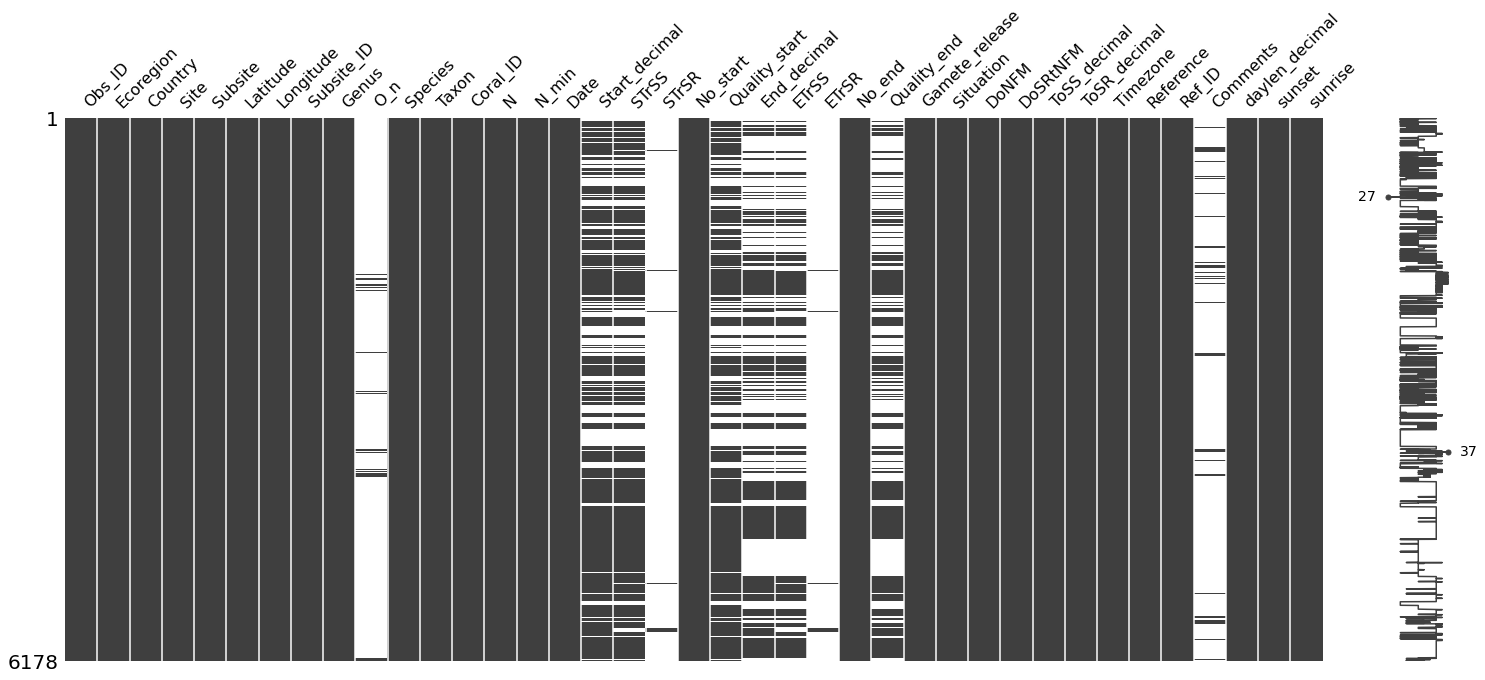

In [17]:
# visualize missing data
msno.matrix(data)

In [18]:
# Check NaN
nulls = pd.DataFrame(round(data.isna().sum()*100/len(data), 2))
nulls.columns = nulls.column=['%NaN']
nulls

,%NaN
Obs_ID,0.00
Ecoregion,0.00
Country,0.00
Site,0.00
Subsite,0.00
Latitude,0.00
Longitude,0.00
Subsite_ID,0.00
Genus,0.00
O_n,95.78


In [19]:
# Check duplicated rows 
data.duplicated().sum()

0

In [20]:
# Copy data into a new dataframe for analysis
df = data.copy()
df.head()

,Obs_ID,Ecoregion,Country,Site,Subsite,Latitude,Longitude,Subsite_ID,Genus,O_n,Species,Taxon,Coral_ID,N,N_min,Date,Start_decimal,STrSS,STrSR,No_start,Quality_start,End_decimal,ETrSS,ETrSR,No_end,Quality_end,Gamete_release,Situation,DoNFM,DoSRtNFM,ToSS_decimal,ToSR_decimal,Timezone,Reference,Ref_ID,Comments,daylen_decimal,sunset,sunrise
0,1,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Porites,NaN,cylindrica,Porites cylindrica,756,-99.0,1.0,1988-10-27,20.500000,2.116667,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Sperm,In situ,1988-10-24,3,18.383333,5.816667,-11.0,Itano & Buckley 1988,69,NaN,13.34,18.23,5.49
1,2,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Porites,NaN,cylindrica,Porites cylindrica,756,15.0,15.0,1995-11-09,20.583333,2.116667,NaN,False,Exact,20.916667,2.450000,NaN,False,Exact,Sperm,In situ,1995-11-06,3,18.466667,5.750000,-11.0,Mundy & Green 1999,97,NaN,13.42,18.27,5.45
2,3,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Acropora,NaN,muricata,Acropora muricata,96,-99.0,1.0,1995-11-10,20.333333,1.866667,NaN,False,Exact,21.333333,2.866667,NaN,False,Exact,Bundles,In situ,1995-11-06,4,18.466667,5.750000,-11.0,Mundy & Green 1999,97,NaN,13.43,18.28,5.45
3,4,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Merulina,NaN,ampliata,Merulina ampliata,1190,6.0,6.0,1995-11-11,19.750000,1.283333,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Bundles,In situ,1995-11-06,5,18.466667,5.733333,-11.0,Mundy & Green 1999,97,NaN,13.44,18.28,5.44
4,5,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,na,-14.279444,-170.700833,1,Montipora,NaN,grisea,Montipora grisea,249,3.0,3.0,1995-11-11,20.750000,2.283333,NaN,False,Exact,NaN,NaN,NaN,True,NaN,Bundles,In situ,1995-11-06,5,18.466667,5.733333,-11.0,Mundy & Green 1999,97,NaN,13.44,18.28,5.44


In [21]:
# Remove columns (contains >90% NaN), index columns, and other columns that will not be used in the model
df = df.drop(['Obs_ID', 'Subsite_ID', 'O_n', 'ETrSR', 'Subsite',
              'Coral_ID', 'STrSR', 'No_start', 
              'Quality_start', 'N', 'End_decimal', 'ETrSS', 'ETrSR', 'No_end', 'Quality_end',
              'Situation', 'Timezone', 'DoNFM',
              'Reference', 'Ref_ID', 'Comments'], axis=1)
print(df.shape)
df.head()

(6178, 19)


,Ecoregion,Country,Site,Latitude,Longitude,Genus,Species,Taxon,N_min,Date,Start_decimal,STrSS,Gamete_release,DoSRtNFM,ToSS_decimal,ToSR_decimal,daylen_decimal,sunset,sunrise
0,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,-14.279444,-170.700833,Porites,cylindrica,Porites cylindrica,1.0,1988-10-27,20.500000,2.116667,Sperm,3,18.383333,5.816667,13.34,18.23,5.49
1,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,-14.279444,-170.700833,Porites,cylindrica,Porites cylindrica,15.0,1995-11-09,20.583333,2.116667,Sperm,3,18.466667,5.750000,13.42,18.27,5.45
2,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,-14.279444,-170.700833,Acropora,muricata,Acropora muricata,1.0,1995-11-10,20.333333,1.866667,Bundles,4,18.466667,5.750000,13.43,18.28,5.45
3,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,-14.279444,-170.700833,Merulina,ampliata,Merulina ampliata,6.0,1995-11-11,19.750000,1.283333,Bundles,5,18.466667,5.733333,13.44,18.28,5.44
4,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,-14.279444,-170.700833,Montipora,grisea,Montipora grisea,3.0,1995-11-11,20.750000,2.283333,Bundles,5,18.466667,5.733333,13.44,18.28,5.44


In [22]:
# Check NaN again after removing unwanted columns
nulls = pd.DataFrame(round(df.isna().sum()*100/len(df), 2))
nulls.columns = nulls.column=['%NaN']
nulls

,%NaN
Ecoregion,0.00
Country,0.00
Site,0.00
Latitude,0.00
Longitude,0.00
Genus,0.00
Species,0.00
Taxon,0.00
N_min,0.02
Date,0.00


### Dealing with NaN in the target column ('Start_decimal')
- Because 'Start_decimal' is the target of our model
- Filling NaN with values might not be appropriate approach
- Dropping NaN >> 27% of the data will be lost. Since other colums are filled, the best use is to keep them as a test dataset

**Best approach** is to keep those missing values as a **Test Dataset**

#### Reference:
-[About Train, Validation and Test Sets in Machine Learning](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

In [23]:
# Separate NaN rows in the target and keep it for the Test Dataset
test_dataset = df[df['Start_decimal'].isna()]
test_dataset = test_dataset.reset_index(drop=True)
print(len(test_dataset))
test_dataset.head()

1694


,Ecoregion,Country,Site,Latitude,Longitude,Genus,Species,Taxon,N_min,Date,Start_decimal,STrSS,Gamete_release,DoSRtNFM,ToSS_decimal,ToSR_decimal,daylen_decimal,sunset,sunrise
0,"Tuvalu, Samoa and Tonga",American Samoa,Faga’alu,-14.279444,-170.700833,Merulina,ampliata,Merulina ampliata,2.0,1995-11-12,NaN,NaN,Bundles,6,18.483333,5.733333,13.45,18.29,5.44
1,Central and northern Great Barrier Reef,Australia,Big Broadhurst Reef,-18.929444,147.757222,Acropora,gemmifera,Acropora gemmifera,1.0,1982-12-06,NaN,NaN,Bundles,5,18.600000,5.383333,13.13,18.36,5.23
2,Central and northern Great Barrier Reef,Australia,Big Broadhurst Reef,-18.929444,147.757222,Acropora,humilis,Acropora humilis,1.0,1982-12-06,NaN,NaN,Bundles,5,18.600000,5.383333,13.13,18.36,5.23
3,Central and northern Great Barrier Reef,Australia,Big Broadhurst Reef,-18.929444,147.757222,Acropora,loripes,Acropora loripes,1.0,1982-12-06,NaN,NaN,Bundles,5,18.600000,5.383333,13.13,18.36,5.23
4,Central and northern Great Barrier Reef,Australia,Big Broadhurst Reef,-18.929444,147.757222,Acropora,nasuta,Acropora nasuta,1.0,1982-12-06,NaN,NaN,Bundles,5,18.600000,5.383333,13.13,18.36,5.23


In [24]:
# Finally, remove those NaN from the working df
df = df.dropna().reset_index(drop=True)
len(df)
#df.head()

4396

In [25]:
# Save datafram to csv
df.to_csv('coral_spawning_cleaned.csv', index=False)
test_dataset.to_csv('spawning_time_test_dataset.csv', index=False)